In [2]:
import kagglehub

DATASET_PATH = kagglehub.dataset_download(
    "vipoooool/new-plant-diseases-dataset"
)

print(DATASET_PATH)


Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
/kaggle/input/new-plant-diseases-dataset


In [3]:
import os

print("Dataset root path:")
print(DATASET_PATH)

print("\nContents of dataset root:")
print(os.listdir(DATASET_PATH))


Dataset root path:
/kaggle/input/new-plant-diseases-dataset

Contents of dataset root:
['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']


In [4]:
for item in os.listdir(DATASET_PATH):
    print(item)


New Plant Diseases Dataset(Augmented)
new plant diseases dataset(augmented)
test


In [5]:
DATA_ROOT = os.path.join(
    DATASET_PATH,
    "New Plant Diseases Dataset(Augmented)",
    "New Plant Diseases Dataset(Augmented)"
)

print(os.listdir(DATA_ROOT))


['valid', 'train']


In [6]:
TRAIN_DIR = os.path.join(DATA_ROOT, "train")
VAL_DIR   = os.path.join(DATA_ROOT, "valid")

print("Train dir:", TRAIN_DIR)
print("Val dir:", VAL_DIR)


Train dir: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Val dir: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



In [9]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)

predictions = Dense(
    train_generator.num_classes,
    activation="softmax"
)(x)

model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,595,686 (9.90 MB)

 Trainable params: 337,702 (1.29 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 479s 210ms/step - accuracy: 0.4821 - loss: 1.9828 - val_accuracy: 0.9011 - val_loss: 0.3778
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 75ms/step - accuracy: 0.8491 - loss: 0.4994 - val_accuracy: 0.9281 - val_loss: 0.2542
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 163s 74ms/step - accuracy: 0.8906 - loss: 0.3573 - val_accuracy: 0.9421 - val_loss: 0.2029
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 72ms/step - accuracy: 0.9117 - loss: 0.2836 - val_accuracy: 0.9480 - val_loss: 0.1771
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 167s 76ms/step - accuracy: 0.9250 - loss: 0.2387 - val_accuracy: 0.9523 - val_loss: 0.1569


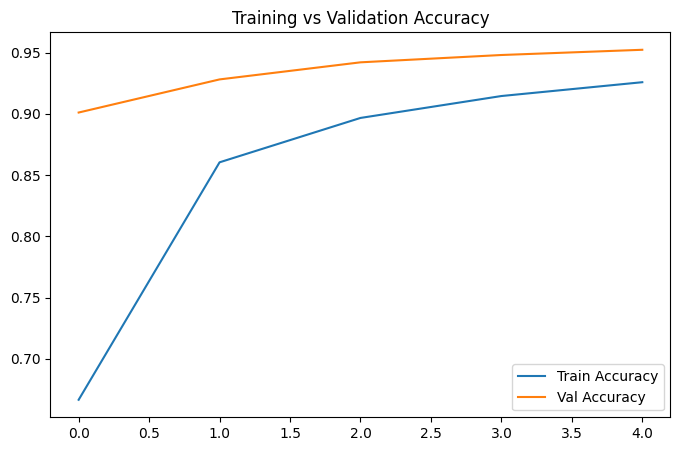

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [13]:
model.save("plant_disease_model.h5")


In [14]:
import json

class_mapping = train_generator.class_indices

with open("class_mapping.json", "w") as f:
    json.dump(class_mapping, f)


In [15]:
from google.colab import files

files.download("plant_disease_model.h5")
files.download("class_mapping.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


550/550 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.9539 - loss: 0.1522
Validation Loss: 0.1569
Validation Accuracy: 0.9523


In [21]:
val_generator_eval = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False   # 🔥 CRITICAL
)


Found 17572 images belonging to 38 classes.


In [22]:
import numpy as np

y_pred_probs = model.predict(val_generator_eval)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator_eval.classes


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step


In [23]:
from sklearn.metrics import classification_report

class_names = list(val_generator_eval.class_indices.keys())

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.99      0.98      0.98       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.87      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.97      0.

In [24]:
import tensorflow as tf

top_3 = tf.keras.metrics.top_k_categorical_accuracy(
    tf.keras.utils.to_categorical(y_true, num_classes=len(class_names)),
    y_pred_probs,
    k=3
)

print("Top-3 Accuracy:", float(np.mean(top_3)))


Top-3 Accuracy: 0.9942522048950195
